# Example of high-level interface

In [1]:
import numpy as np
import pylab as plt
import swyft
import torch
from scipy import stats
from tqdm import tqdm
from itertools import compress
from tqdm import tqdm
%load_ext autoreload
%autoreload 2

np.random.seed(25)
torch.manual_seed(25)

In [2]:
DEVICE = 'cuda:0'
SIGMA=0.006

## Toy generative model

In [27]:
def model(z):
    z = (z-0.5) * 2
    
    sigma1 = (z[0]**2 + z[1]**2)**0.5
    sigma2 = max(z[0], z[2])
    sigma3 = max(z[1]*2, z[2])
    
    sigma1 = 10**(sigma1*4-1)
    sigma2 = 10**(sigma2*4-1)
    sigma3 = 10**(sigma3*4-1)
    
    mu_sig = np.array([sigma1, sigma2, sigma3])
    mu_bg = 1.3
    
    x = np.random.poisson(mu_sig + mu_bg)
    return x

In [36]:
z0 = np.array([0.5,0.5,0.5])
x0 = model(z0)
print(x0, z0)

[1 1 2] [0.5 0.5 0.5]


## Automatic inference 1-dim and 2-dim posteriors

In [37]:
ds = swyft.DataStore()
ds.init(zdim = 3, xdim = (3,))

Creating empty datastore: None
...don't forget to run `init` to set up storage parameters.
Datastore initialized.


In [38]:
sw = swyft.SWYFT(x0, zdim = 3, device = DEVICE, head = None, datastore = ds, nsamples = 10000)
ds.simulate(model)
sw.train1d(max_epochs = 5, nbatch = 32)

Simulate:   0%|          | 0/9935 [00:00<?, ?it/s]

Constrained posterior area: 1.0
Adding 9935 new samples. Run simulator!


Simulate: 100%|██████████| 9935/9935 [00:07<00:00, 1363.20it/s]


Start training
LR iteration 0
Total epochs: 5
Validation losses: [6.822037100791931, 6.515185087919235, 6.353526681661606, 6.345005244016647, 6.2430985271930695]
LR iteration 1
Total epochs: 5
Validation losses: [5.979281067848206, 5.948604375123978, 5.91580057144165, 5.891721308231354, 5.865921825170517]
LR iteration 2
Total epochs: 5
Validation losses: [5.821454346179962, 5.817036032676697, 5.814459949731827, 5.812172085046768, 5.810022562742233]


## Plot posteriors

In [39]:
sw.trainNd(swyft.comb2d([0, 1, 2]), nbatch = 32, max_epochs = 5)

Start training
LR iteration 0
Total epochs: 5
Validation losses: [5.984172463417053, 5.300031930208206, 4.912743791937828, 4.792098194360733, 4.742409974336624]
LR iteration 1
Total epochs: 5
Validation losses: [4.069045394659042, 3.993644893169403, 3.9464968889951706, 3.9043862968683243, 3.865868642926216]
LR iteration 2
Total epochs: 5
Validation losses: [3.8208053708076477, 3.8132006973028183, 3.806817978620529, 3.8017546385526657, 3.796657979488373]


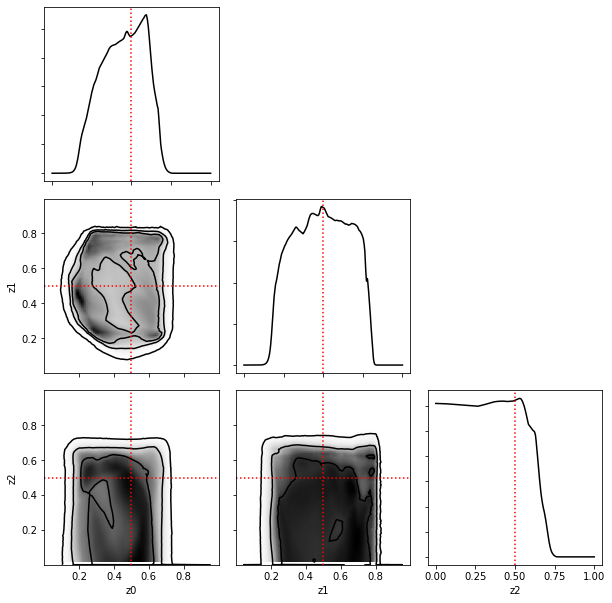

In [40]:
swyft.corner(sw, z0 = z0, tag = 'default', cmap = 'Greys', params = [0, 1, 2], dim = 10)